In [37]:
from xml.etree.ElementTree import PI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import os
import random
import seaborn as sns
import csv
import collections
from keras.preprocessing.image import load_img
from matplotlib.pyplot import figure
from tensorflow.python.client import device_lib
#from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import backend as K

print(device_lib.list_local_devices())
warnings.filterwarnings('ignore')

mypath = "C:/Users/sager/OneDrive/Desktop/CS5824/Project/Models/cat_dog_classifier/cat_dog_classifier/kagglecatsanddogs_3367a/petfinder-pawpularity-score"
files = [os.path.splitext(filename)[0] for filename in os.listdir(mypath + "/train")]
#print(files)

filetr = open(mypath + "/train.csv")
csvreadertr = csv.reader(filetr)

tr_data = []
for row in csvreadertr:
    tr_data.append((row[0], row[13]))
del tr_data[0]

assert(collections.Counter(list(zip(*tr_data))[0]) == collections.Counter(files))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 952191149489288395
xla_global_id: -1
]


In [38]:
df = pd.DataFrame()
df['images'] = files
df['label'] = list(zip(*tr_data))[1]
df['label'] = df['label'].astype(int)

[47, 39, 55, 70, 31, 53, 30, 12, 33, 31, 24, 24, 36, 48, 29, 76, 99, 41, 41, 25, 25, 44, 32, 78, 50]


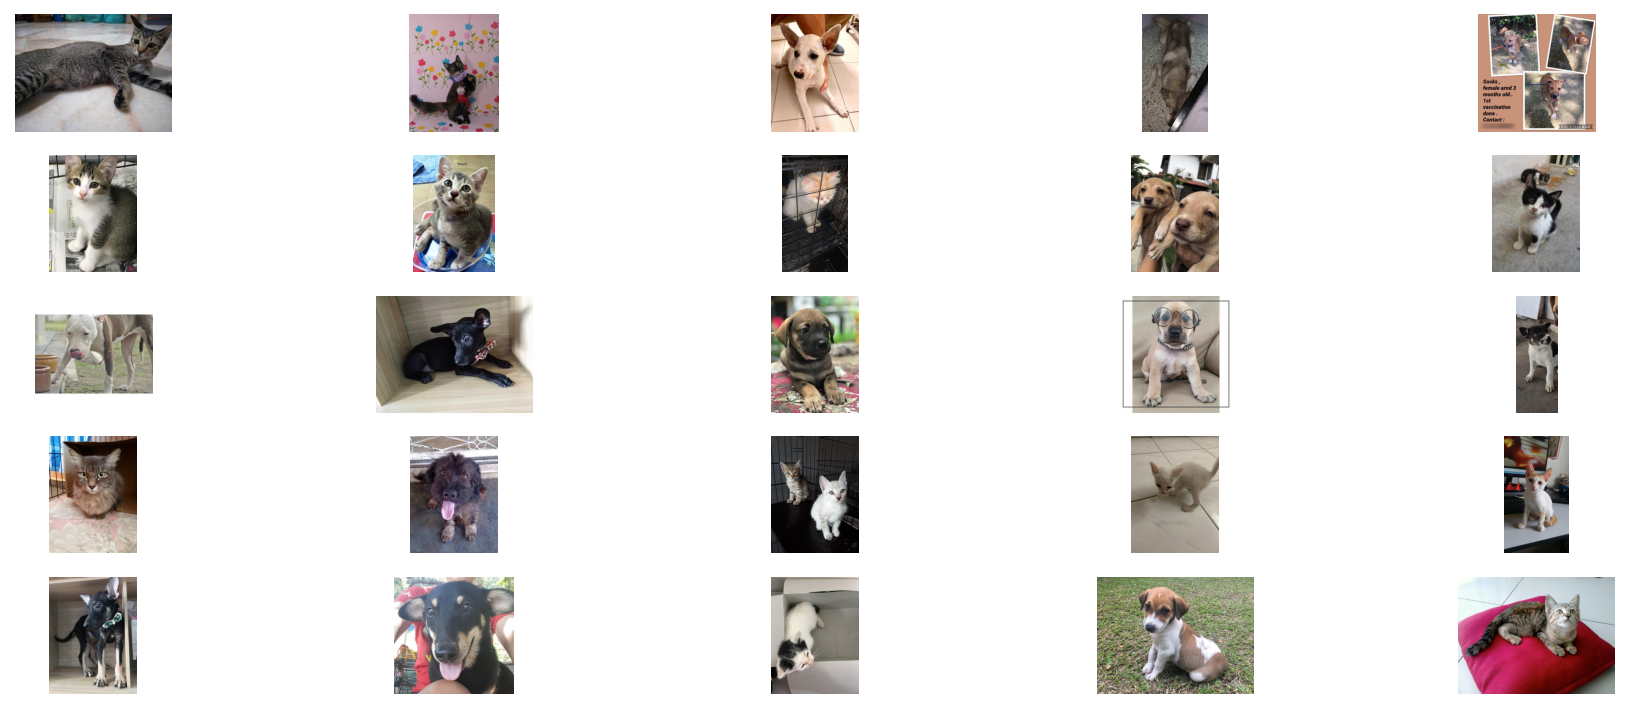

In [39]:
figure(figsize = (15, 6), dpi = 150)

temp = df['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

#TODO: figure out how to put ratings beneath each image
ratings = []
for index,file in enumerate(files):    
    plt.subplot(5,5,index+1)
    img = load_img(mypath + "/train/" + file + ".jpg")
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    ratings.append(np.array(df['label'][df['images'] == file])[0])

print(ratings)

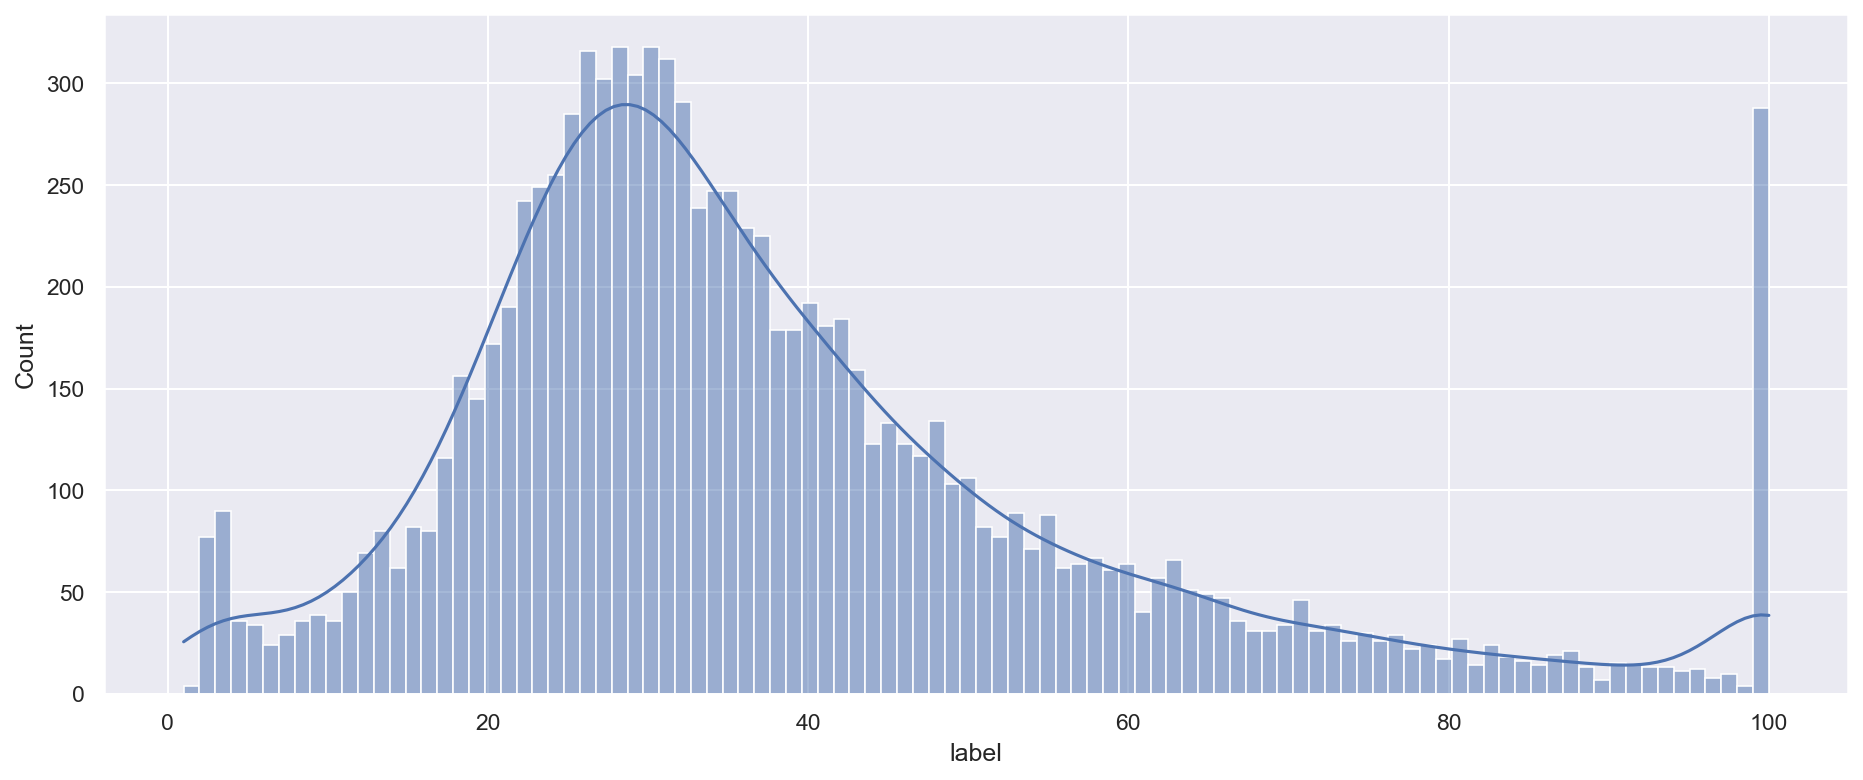

In [40]:
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 100, kde = True)
plt.show()

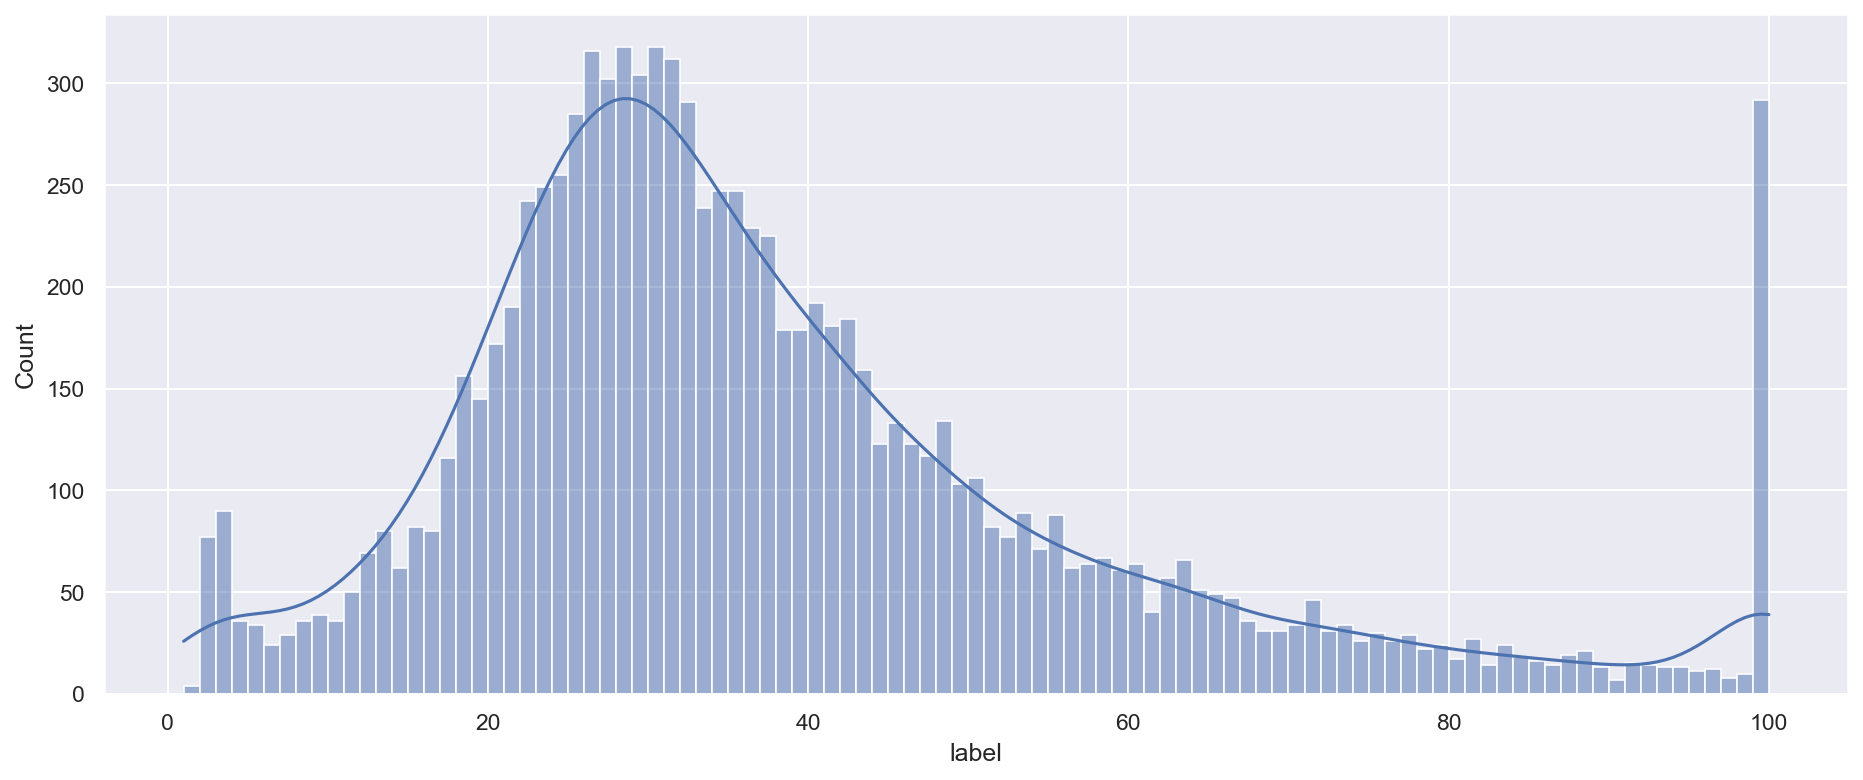

In [41]:
#df = df[(df['label'] < 100)]
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 99, kde = True)
plt.show()

In [42]:
print(df[df['label'] == 5])
print(df[df['label'] == 100])

                                images  label
244   06a6c682c8042ba462bbb4cd2305bcbd      5
284   07c58f193424517a7c4e1279e09b8c0c      5
393   0a51fa22c7b84249889d1e157c54c11f      5
476   0cb44295fe5d7c2b4abaa02376c65b43      5
1361  22d14698a4a18ab79db253713c298a05      5
1557  27c207f94044c5255277a4143dcf5f5e      5
1693  2b0ea572f6b234340b08cee2f5a06e3f      5
1811  2de3bf4fdcefa2f3c5e5b77fa1e3d262      5
1934  317d3d7707bb1c8aba79e57763bab11c      5
2053  34dc983bbf8b3b102eb268d9f572999b      5
2265  3a4c5720a88248353e1d1c9986804e45      5
2391  3d946559e2b4b210a06e9103b0dd72e9      5
2907  4b0fedfdf53c4383aa19f2b040b3232c      5
3299  551f605f8f2415db69d5f5e750deedae      5
3430  58b63c25c86a40f2120cf2f8f1237fa2      5
3463  5988763f72db654577b4c58724823f8a      5
3880  62d74b5f0ffac552f53e3db5c2a2dffd      5
4197  6b3095627abbdfc50a1cd5c7dd86cec8      5
4683  786a35ac0e6f8c2a7216ea7e551b23b4      5
4690  78a02b3cb6ed38b2772215c0c0a7f78e      5
5164  853e2f755ef373dfc5f28f617d4c

In [43]:
df['images'] = mypath + "/train/" + df['images'] + ".jpg" 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=11)

In [44]:
print(train[train['label'] == 100])
print(test[test['label'] == 100])

                                                 images  label
4378  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
2881  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
963   C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
2129  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
5350  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
...                                                 ...    ...
6615  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
1763  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
7158  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
5292  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
3029  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100

[237 rows x 2 columns]
                                                 images  label
2267  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
9397  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
2401  C:/Users/sager/OneDrive/D

In [45]:
#train = train[(train['label'] < 100) & (train['label'] > 5)]
print(train[train['label'] == 100])
print(test[test['label'] == 100])

                                                 images  label
4378  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
2881  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
963   C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
2129  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
5350  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
...                                                 ...    ...
6615  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
1763  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
7158  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
5292  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
3029  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100

[237 rows x 2 columns]
                                                 images  label
2267  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
9397  C:/Users/sager/OneDrive/Desktop/CS5824/Project...    100
2401  C:/Users/sager/OneDrive/D

In [11]:
#df['label'] = df['label'].astype('str')
#train['label'] = train['label'].astype('str')
#test['label'] = test['label'].astype('str')

In [46]:
print(train['label'])

9900    20
117     46
7672    28
5522    29
1218    35
        ..
1293    22
4023    63
7259    61
5200    29
3775    15
Name: label, Length: 7929, dtype: int32


In [47]:
# Create data generator for the images
# splitting into testing and training data
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, # normalize the image 
    rotation_range = 40, # augmentation of images (helps to avoid overfitting)
    width_shift_range=0.35,
    height_shift_range=0.35,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
)

val_generator = ImageDataGenerator(rescale=1./255)

# TODO: can't seem to find documentation on what target_size does under hood
# from source code, the 'dataframe' argument is the dataframe of full image paths
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='raw',    
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=64,
    class_mode='raw',
)

Found 7929 validated image filenames.
Found 1983 validated image filenames.


In [49]:
len(train_iterator)
len(train_iterator[0])
len(train_iterator[0][0])
len(train_iterator[0][0][0])
a = train_iterator[0]
len(train_iterator)
b = train_iterator[0]
#print(a[0] - b[0])

#print(np.array(train_iterator[123][0]).shape)
#train_iterator[0][1][0][0][0]
testflat = np.array(train_iterator[0][0])
print(testflat.shape)
#print(testflat_f.shape)

counter = 0
stack = None
super = None
for s in train_iterator:    
    testflat = s[0]
    if (counter == 3000):
        break
    for b in testflat:
        #counter = counter + 1
        if (stack is None):
            stack = b.flatten()
        else: stack = np.vstack((stack, b.flatten()))
        print(stack.shape)
    if (super is None):
            super = stack
    else: super = np.vstack((super, stack))
    counter = counter + 1


In [50]:
x_np_array = np.zeros(389726208+49152*2)
x_np_array = np.reshape(x_np_array, (7929 + 2, 49152))
#print(x_np_array.shape)
#print(x_np_array)

y_np_array = np.zeros(7929 + 2)
y_np_array = np.reshape(y_np_array, (7929 + 2, 1))
print(y_np_array.shape)

(7931, 1)


In [51]:
xv_np_array = np.zeros(1983*128*128*3 + 49152*2)
xv_np_array = np.reshape(xv_np_array, (1983 + 2, 49152))
#print(x_np_array.shape)
#print(x_np_array)

yv_np_array = np.zeros(1983 + 2)
yv_np_array = np.reshape(yv_np_array, (1983 + 2, 1))
print(yv_np_array.shape)

(1985, 1)


In [52]:
counter = 0

for _, s in enumerate(train_iterator):    
    batch = s[0]
    batch_labels = s[1]
    
    cardinality = batch.shape[0]       
    print("batch size: " + str(cardinality))

    for c in range(cardinality):
        print("c: " + str(c))
        x_np_array[counter] = batch[c].flatten()
        y_np_array[counter] = batch_labels[c]             
        print("counter: " + str(counter))
        counter = counter + 1    

#print(y_np_array)

batch size: 64
c: 0
counter: 0
c: 1
counter: 1
c: 2
counter: 2
c: 3
counter: 3
c: 4
counter: 4
c: 5
counter: 5
c: 6
counter: 6
c: 7
counter: 7
c: 8
counter: 8
c: 9
counter: 9
c: 10
counter: 10
c: 11
counter: 11
c: 12
counter: 12
c: 13
counter: 13
c: 14
counter: 14
c: 15
counter: 15
c: 16
counter: 16
c: 17
counter: 17
c: 18
counter: 18
c: 19
counter: 19
c: 20
counter: 20
c: 21
counter: 21
c: 22
counter: 22
c: 23
counter: 23
c: 24
counter: 24
c: 25
counter: 25
c: 26
counter: 26
c: 27
counter: 27
c: 28
counter: 28
c: 29
counter: 29
c: 30
counter: 30
c: 31
counter: 31
c: 32
counter: 32
c: 33
counter: 33
c: 34
counter: 34
c: 35
counter: 35
c: 36
counter: 36
c: 37
counter: 37
c: 38
counter: 38
c: 39
counter: 39
c: 40
counter: 40
c: 41
counter: 41
c: 42
counter: 42
c: 43
counter: 43
c: 44
counter: 44
c: 45
counter: 45
c: 46
counter: 46
c: 47
counter: 47
c: 48
counter: 48
c: 49
counter: 49
c: 50
counter: 50
c: 51
counter: 51
c: 52
counter: 52
c: 53
counter: 53
c: 54
counter: 54
c: 55
counter: 

IndexError: index 7931 is out of bounds for axis 0 with size 7931

In [53]:
counter = 0

for s in val_iterator:    
    batch = s[0]
    batch_labels = s[1]
   
    cardinality = batch.shape[0]       
    print("batch size: " + str(cardinality))

    for c in range(cardinality):
        print("c: " + str(c))
        xv_np_array[counter] = batch[c].flatten()
        yv_np_array[counter] = batch_labels[c]             
        print("counter: " + str(counter))
        counter = counter + 1    

#print(y_np_array)

batch size: 64
c: 0
counter: 0
c: 1
counter: 1
c: 2
counter: 2
c: 3
counter: 3
c: 4
counter: 4
c: 5
counter: 5
c: 6
counter: 6
c: 7
counter: 7
c: 8
counter: 8
c: 9
counter: 9
c: 10
counter: 10
c: 11
counter: 11
c: 12
counter: 12
c: 13
counter: 13
c: 14
counter: 14
c: 15
counter: 15
c: 16
counter: 16
c: 17
counter: 17
c: 18
counter: 18
c: 19
counter: 19
c: 20
counter: 20
c: 21
counter: 21
c: 22
counter: 22
c: 23
counter: 23
c: 24
counter: 24
c: 25
counter: 25
c: 26
counter: 26
c: 27
counter: 27
c: 28
counter: 28
c: 29
counter: 29
c: 30
counter: 30
c: 31
counter: 31
c: 32
counter: 32
c: 33
counter: 33
c: 34
counter: 34
c: 35
counter: 35
c: 36
counter: 36
c: 37
counter: 37
c: 38
counter: 38
c: 39
counter: 39
c: 40
counter: 40
c: 41
counter: 41
c: 42
counter: 42
c: 43
counter: 43
c: 44
counter: 44
c: 45
counter: 45
c: 46
counter: 46
c: 47
counter: 47
c: 48
counter: 48
c: 49
counter: 49
c: 50
counter: 50
c: 51
counter: 51
c: 52
counter: 52
c: 53
counter: 53
c: 54
counter: 54
c: 55
counter: 

IndexError: index 1985 is out of bounds for axis 0 with size 1985

In [99]:
subX = x_np_array[0:2000,]
subY = y_np_array[0:2000,]
print(subX.shape)
print(subY.shape)

(2000, 49152)
(2000, 1)


In [145]:
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
rbX = RobustScaler()
X = rbX.fit_transform(subX)

rbY = RobustScaler()
Y = rbY.fit_transform(subY)

svr_rbf = SVR(kernel='linear', C=0.01, epsilon=0.05, gamma='auto')
#y_rbf = svr_rbf.fit(subX, subY).predict(subX)
svr = svr_rbf.fit(X, Y.ravel())

In [147]:
vis_set_true = subY[0:50]
yhat = svr.predict(X)

In [149]:
valX = x_np_array[3000:3050,]
valY = y_np_array[3000:3050,]
#print(valX)
#print(valY)
#print(np.mean(subY[0:50] - yhat))

In [150]:
#print(yhat)
#print(Y.ravel())
#print(rbY.inverse_transform(yhat.reshape(-1,1)))
#print(rbY.inverse_transform(Y.ravel().reshape(-1,1)))
#print(subY)

In [151]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(Y, yhat)), '.3f'))
print(rmse)

0.06


In [152]:
testpred = svr.predict(rbX.transform(valX))

In [160]:
#print(rbY.fit_transform(valY).ravel())
#print(testpred)
#testpred_t = rbY.inverse_transform(testpred.reshape(-1,1))
#print(valY - testpred_t)
#print(testpred_t)
#print(rbY.fit_transform(valY).ravel() - testpred_t)

[[ 30.82985365]
 [ 35.16066751]
 [ 57.81042681]
 [ 73.72983165]
 [ 55.51319341]
 [ 43.03593174]
 [ 59.37877259]
 [ 32.62388472]
 [ 55.24473566]
 [ -8.28650029]
 [ 26.51783747]
 [ 41.55080025]
 [ 82.28963838]
 [ 58.68605086]
 [ 98.92437673]
 [-19.01257145]
 [ 36.40010919]
 [ 21.49112733]
 [-18.54210337]
 [ 52.87788357]
 [  7.60714195]
 [ 70.70618954]
 [ 47.37887723]
 [ 40.41609285]
 [ 38.98836692]
 [ 23.75996554]
 [ 33.82272781]
 [ 26.85045465]
 [ 54.75653162]
 [ 19.75495162]
 [ 51.80798315]
 [ 10.66691822]
 [ 27.60277118]
 [ 22.64335618]
 [ 42.56610028]
 [ 28.84863983]
 [ 30.98305397]
 [ 50.13390144]
 [ 39.07400564]
 [ 33.20173662]
 [ 39.66479419]
 [ 26.91784237]
 [  1.02319753]
 [ 77.28407874]
 [ 49.22287698]
 [ 31.39199906]
 [ 33.64298629]
 [ 41.49094634]
 [  7.99813163]
 [ 43.4366392 ]]


In [154]:
rmse_v = float(format(np.sqrt(mean_squared_error(rbY.fit_transform(valY).ravel(), testpred)), '.3f'))
print(rmse_v)

1.391


TypeError: Invalid shape (49152,) for image data

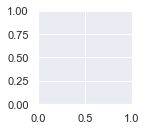

In [65]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(valX[i])
    plt.axis('off')
plt.show()

for j in range(25):
    print('ind: ' + str(j) + ' , actual label: ' + str(valY[j]) + ' predicted label: ' + str(testpred[j]))



model2 = Sequential([
    Conv2D(64, (7,7), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((3,3)),
    Conv2D(16, (5,5), activation='relu'),
    MaxPool2D((3,3)),
    Conv2D(16, (4,4), activation='relu'),
    Conv2D(16, (2,2), activation='relu'),
    #Conv2D(256, (2,2), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(rate = 0.25),    
    Dense(2048, activation='sigmoid'),    
    Dense(1, activation='linear'),
])